In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft, fftfreq
from scipy.io.wavfile import write, read

# Sampling

In [2]:
# Definir una frecuencia
f = 1
fs = 5 # Medidas por segundo

In [3]:
t = np.linspace(0.,1.,2*fs, endpoint=False)
#print(t)

In [4]:
# Señal Periodica
x = np.cos(2*np.pi*f*t) + np.cos(4*np.pi*f*t) 

In [5]:
# Señal No periodica
#x = np.sin( np.sqrt(t) )

Text(0, 0.5, '$tiempo[s]$')

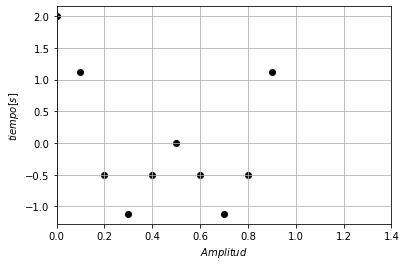

In [6]:
plt.figure()
plt.scatter(t,x, c='black')
plt.grid()
plt.xlim(0,1.4)
plt.xlabel(r'$Amplitud$')
plt.ylabel(r'$tiempo[s]$')

In [7]:
def GetFFT(x):
    
    Npoints = len(x)
    c = (2.0*np.pi)/Npoints
    
    fft = []
    
    for k in range(Npoints):
        
        Re = 0.
        Im = 0.
        
        for n in range(Npoints):
            
            Re += x[n]*np.cos( c*k*n )
            Im -= x[n]*np.sin( c*k*n )
            
        fft = np.append(fft, complex(Re,Im))
        
    return fft

In [8]:
Xw = GetFFT(x)
print(Xw)

[-1.33226763e-15+0.00000000e+00j  5.00000000e+00-6.66133815e-16j
  5.00000000e+00+4.44089210e-16j -9.99200722e-16-1.33226763e-15j
  2.22044605e-16-2.22044605e-16j -4.44089210e-16-1.22464680e-15j
  1.44328993e-15-2.22044605e-15j  5.93969318e-15-2.88657986e-15j
  5.00000000e+00+3.10862447e-15j  5.00000000e+00+2.44249065e-15j]


In [9]:
# FFT de Numpy
Xw1 = fft(x)
print(Xw1)

[-1.33226763e-15+0.00000000e+00j  5.00000000e+00-1.11022302e-15j
  5.00000000e+00-3.66617572e-16j  0.00000000e+00-4.53861057e-16j
  2.22044605e-16+3.57096665e-16j -4.99600361e-16+4.43948501e-17j
  2.22044605e-16-3.57096665e-16j  3.88578059e-16+5.10716662e-16j
  5.00000000e+00+3.66617572e-16j  5.00000000e+00+1.00897257e-15j]


In [10]:
# Inversa

def GetIFFT(x):
    
    Npoints = len(x)
    c = (2.0*np.pi)/Npoints
    
    ifft = []
    
    for k in range(Npoints):
        
        Re = 0.
        Im = 0.
        
        for n in range(Npoints):
            
            Re += x[n]*np.cos( c*k*n )
            Im += x[n]*np.sin( c*k*n )
            
        ifft = np.append(ifft, complex(Re,Im)/Npoints)
        
    return ifft

In [11]:
Xt = GetIFFT(Xw)
print(Xt)

[ 2.00000000e+00-2.55691443e-16j  1.11803399e+00-9.54295184e-17j
 -5.00000000e-01+1.06547396e-15j -1.11803399e+00+7.84448088e-16j
 -5.00000000e-01+1.77295537e-16j  2.66453526e-16+4.77736048e-16j
 -5.00000000e-01+2.21704458e-16j -1.11803399e+00-1.03730332e-16j
 -5.00000000e-01-6.22065041e-16j  1.11803399e+00+1.37006487e-15j]


In [12]:
Xt1 = ifft(Xw)
print(Xt1)

[ 2.        -2.55691443e-16j  1.11803399+1.22464680e-16j
 -0.5       +9.32108185e-16j -1.11803399+2.88626673e-16j
 -0.5       -4.16595672e-17j  0.        +4.72092686e-16j
 -0.5       -1.36656411e-16j -1.11803399-1.61738245e-15j
 -0.5       -1.11042416e-15j  1.11803399+1.34652181e-15j]


C:\Users\AQ01097\Anaconda3\lib\site-packages\numpy\core\_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


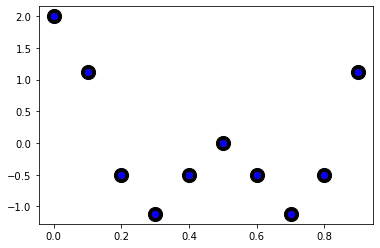

In [13]:
plt.figure()
plt.scatter(t,x,c='k',s=200)
plt.scatter(t,Xt,c='r')
plt.scatter(t,Xt1,c='b')

In [14]:
# Ver transformada en el espacio de las frecuencias
N = len(Xw)
frecuencias = np.fft.fftfreq(N)
print(frecuencias)

[ 0.   0.1  0.2  0.3  0.4 -0.5 -0.4 -0.3 -0.2 -0.1]


In [15]:
# Idea de filtrado
mask = frecuencias > 0. # Tomar positivas

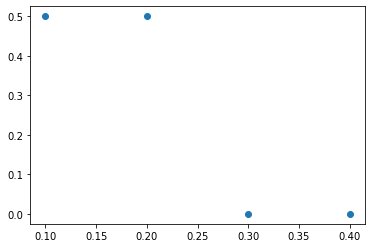

In [16]:
plt.scatter(frecuencias[mask], np.abs(Xw[mask])/N)

# Señal armónica

In [17]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html
# Wav format : 16-bit PCM
# min value: -32768
# max value: +32767
# numpy dtype: int16

In [18]:
# f = 440   # Do
f = 330  # Mi
fs = 44100 
Amax = 32767

In [19]:
t = np.linspace(0,7,2*fs, endpoint=False)
x = np.sin(2.*np.pi*f*t)

In [20]:
print(2*np.pi*f)

2073.4511513692632


In [21]:
scaled = np.int16( x*Amax)
print(scaled.min(), scaled.max())

-32767 32767


In [22]:
write('Do.wav', 44100, scaled)

In [23]:
# Queremos ver esta nota musical en el espectro de frecuencias

Xw = fft(x)

Xw = Xw * 2 / len(x)

freqs = fftfreq(len(x))*fs

mask = freqs  >= 0

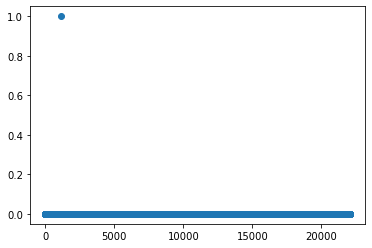

In [24]:
fig, ax = plt.subplots()
ax.scatter(freqs[mask], np.abs(Xw[mask]))

## Señal mezclada

In [45]:
f0 = 330
fs = 44100 # Sampling rate

# Superponer varias señales
f = np.array([2.,3.,4.,8.,12.])
f *= f0
Amp = np.array([0.3,0.4,0.2,0.2,0.1])
print(f)

[ 660.  990. 1320. 2640. 3960.]


In [26]:
t = np.linspace(0.,2.,2*fs, endpoint=False)
x = np.sin( 2.*np.pi*f0*t ) # Frecuencia fundamental

for i in range(len(f)):
    x += Amp[i]*np.sin(2.*np.pi*f[i]*t)

(0.0, 0.0125)

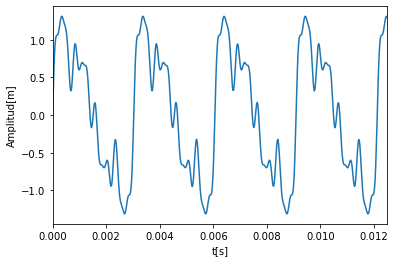

In [27]:
fig, ax = plt.subplots()
ax.plot(t, x)
ax.set_xlabel('t[s]')
ax.set_ylabel('Amplitud[m]')
ax.set_xlim(0,1./80.)

In [28]:
scaled = np.int16( x*Amax/np.max(np.abs(x)) )
write('Test_MixSignal.wav', 44100, scaled)

In [29]:
X = fft(x)
X = X * 2 /len(x)
frecuencias = fftfreq(len(x))*fs


# Aplicando las mascaras

mask = freqs < 3000

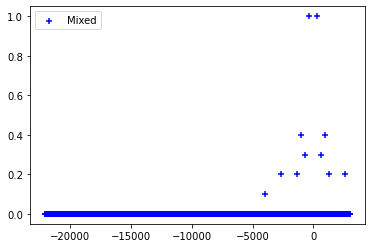

In [30]:
fig, ax = plt.subplots()
ax.scatter(frecuencias[mask], np.absolute(X[mask]), c="b", label="Mixed", marker="+")
ax.legend(loc=0)
#ax.set_xlim(0,fs/2)

In [31]:
x = np.random.uniform(-1., 1., fs * 2)
scaled = np.int16(x*Amax)
write('Test_CosmicMicroBackground.wav', 44100, scaled)

In [32]:
X = fft(x)
X = X * 2 /len(x)
frecuencias = fftfreq(len(x))*fs

mask = frecuencias >= 0

Text(0, 0.5, 'Frequency Domain (Spectrum) Magnitude')

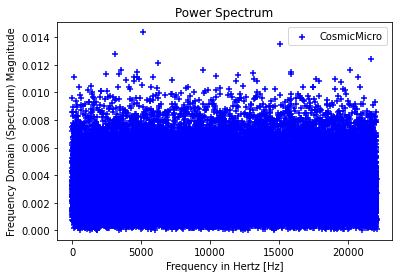

In [33]:
fig, ax = plt.subplots()
ax.scatter(frecuencias[mask], np.absolute(X[mask]), c="b", label="CosmicMicro", marker="+")
ax.legend(loc=0)

ax.set_title('Power Spectrum')
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
#ax.set_xlim(0, fs/2)
#ax.set_ylim(0, 0.02)

In [34]:
ratedo, do = read('data/Do.wav')
print(ratedo, do.shape[0], ratedo/float(do.shape[0]))

16000 49600 0.3225806451612903


In [46]:
# non-negative frecuencies
fftdo = np.fft.rfft(do)
print(do)
print(fftdo[3])

[ 16  10  12 ... -99 -95 -89]
(-488.0395129060185+24.934773780006864j)


In [36]:
# Vamos a calcular las frecuencias
Frecuenciasdo = np.arange(0, do.shape[0]//2 + 1)*ratedo/float(do.shape[0])

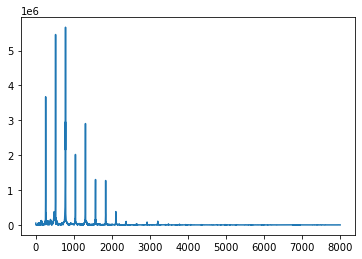

In [37]:
plt.plot(Frecuenciasdo, np.abs(fftdo))

In [38]:
mask = Frecuenciasdo > 1000 

In [39]:
#ii = np.argmax(fftdo)

In [40]:
#ii_A = np.abs(Frecuenciasdo) > (Frecuenciasdo[ii])
#ii_B = np.abs(Frecuenciasdo) < (Frecuenciasdo[ii])

In [41]:
# Hacer todos armonicos igual a 0
#fftdo[ii_A | ii_B ] = 0

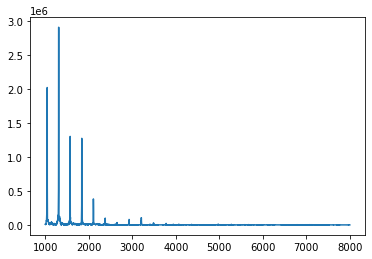

In [42]:
plt.plot(Frecuenciasdo[mask], np.abs(fftdo[mask]))

In [43]:
NewDo = np.fft.irfft(fftdo[mask])
NewDo = NewDo.astype(np.int16)

In [44]:
write('DoRemasterizado',ratedo,NewDo)